<a href="https://colab.research.google.com/github/MariaRodba/MariaRodba/blob/main/Diabetes_NN_final_Paralelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Librerías

In [ ]:
import graphviz
import os
import pandas as pd
from pandas import DataFrame
import numpy as np
import time

import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV #librería para ejecutar MLP
                                                 #classifier en paralelo

import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import ttest_1samp
from scipy.stats import t as t_dist

In [ ]:
def starttime():
    return time.time()


def stoptime():
    return time.time()


def logtime(start, fncname):
    print("--- %s seconds by {%s} ---" % ((stoptime() - start), fncname))

In [ ]:
start = starttime()
dataset = pd.read_csv("Valores_v1_incremento10.csv")
dataset.head()

,Clase,X800.3138,X801.278,X802.2422,X803.2065,X804.1707,X805.1349,X806.0992,X807.0634,X808.0276,...,X1791.546,X1792.51,X1793.474,X1794.438,X1795.403,X1796.367,X1797.331,X1798.295,X1799.26,X1800.224
0,sano,0.049856,0.049609,0.049355,0.049130,0.048947,0.048799,0.048678,0.048580,0.048503,...,0.021084,0.021842,0.022557,0.023001,0.023063,0.022724,0.022094,0.021411,0.020934,0.020787
1,sano,0.078286,0.078173,0.078223,0.078405,0.078650,0.078886,0.079063,0.079165,0.079204,...,0.045550,0.045901,0.046282,0.046531,0.046579,0.046446,0.046196,0.045920,0.045708,0.045614
2,sano,0.022840,0.022854,0.022857,0.022862,0.022880,0.022919,0.022994,0.023126,0.023328,...,0.015791,0.015882,0.015968,0.015998,0.015956,0.015856,0.015723,0.015587,0.015482,0.015430
3,sano,0.020540,0.020408,0.020390,0.020464,0.020561,0.020605,0.020561,0.020455,0.020361,...,0.003207,0.003448,0.003637,0.003680,0.003554,0.003287,0.002949,0.002648,0.002467,0.002415
4,sano,0.054042,0.053784,0.053574,0.053402,0.053226,0.053005,0.052731,0.052424,0.052116,...,0.021593,0.021780,0.022046,0.022279,0.022376,0.022281,0.022024,0.021722,0.021506,0.021428


##Limpieza de dataset -> Se limpia la variable predictora


In [ ]:
datasetPredict = dataset.iloc[:,:1] #Se limpia el dataset para dejar unicamente
                                    #los valor predictores (Y)

datasetPredict

,Clase
0,sano
1,sano
2,sano
3,sano
4,sano
...,...
9995,enfermo
9996,enfermo
9997,enfermo
9998,enfermo


In [ ]:
datasetInfo = dataset.iloc[:, 2:] #Se limpia el dataset para dejar los valores 
                                  #con la información (X)
datasetInfo

,X801.278,X802.2422,X803.2065,X804.1707,X805.1349,X806.0992,X807.0634,X808.0276,X808.9919,X809.9561,...,X1791.546,X1792.51,X1793.474,X1794.438,X1795.403,X1796.367,X1797.331,X1798.295,X1799.26,X1800.224
0,0.049609,0.049355,0.049130,0.048947,0.048799,0.048678,0.048580,0.048503,0.048441,0.048373,...,0.021084,0.021842,0.022557,0.023001,0.023063,0.022724,0.022094,0.021411,0.020934,0.020787
1,0.078173,0.078223,0.078405,0.078650,0.078886,0.079063,0.079165,0.079204,0.079207,0.079195,...,0.045550,0.045901,0.046282,0.046531,0.046579,0.046446,0.046196,0.045920,0.045708,0.045614
2,0.022854,0.022857,0.022862,0.022880,0.022919,0.022994,0.023126,0.023328,0.023585,0.023849,...,0.015791,0.015882,0.015968,0.015998,0.015956,0.015856,0.015723,0.015587,0.015482,0.015430
3,0.020408,0.020390,0.020464,0.020561,0.020605,0.020561,0.020455,0.020361,0.020348,0.020442,...,0.003207,0.003448,0.003637,0.003680,0.003554,0.003287,0.002949,0.002648,0.002467,0.002415
4,0.053784,0.053574,0.053402,0.053226,0.053005,0.052731,0.052424,0.052116,0.051819,0.051520,...,0.021593,0.021780,0.022046,0.022279,0.022376,0.022281,0.022024,0.021722,0.021506,0.021428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.070808,0.070851,0.070893,0.070933,0.070987,0.071086,0.071255,0.071487,0.071746,0.071975,...,0.036806,0.036900,0.037120,0.037327,0.037411,0.037339,0.037154,0.036951,0.036832,0.036853
9996,0.046915,0.047093,0.047292,0.047482,0.047657,0.047834,0.048035,0.048264,0.048503,0.048721,...,0.036518,0.036703,0.036976,0.037164,0.037178,0.037022,0.036752,0.036451,0.036211,0.036106
9997,0.060901,0.060711,0.060548,0.060467,0.060488,0.060583,0.060699,0.060782,0.060795,0.060728,...,0.029783,0.029937,0.030123,0.030223,0.030184,0.030024,0.029820,0.029674,0.029670,0.029823
9998,0.034173,0.033799,0.033455,0.033160,0.032937,0.032800,0.032743,0.032739,0.032754,0.032762,...,0.027958,0.028212,0.028378,0.028389,0.028244,0.027972,0.027637,0.027332,0.027143,0.027089


# Calculo de error con LOOCV

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

--- 586.874885559082 seconds by {NN} ---


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


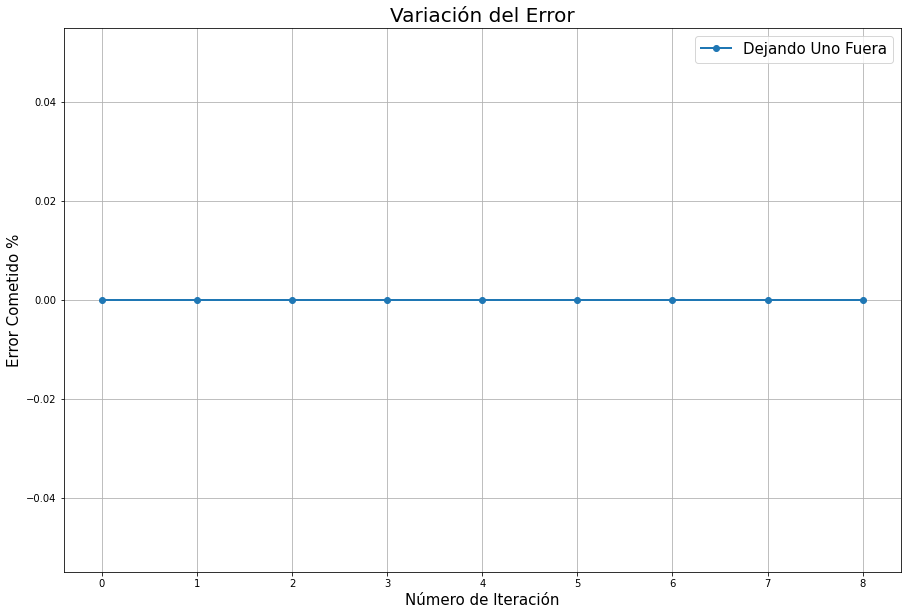

In [ ]:
n = dataset.shape[0]
error_loo = []

for i in range(0, 9):
    error_i = 0
    X_train, X_test, y_train, y_test = train_test_split(datasetInfo, 
                                                        datasetPredict, 
                                                        train_size = 0.8)

    #X,y = make_classification(n_samples = 4) #Se declara el número de trabajos a realizar en paralelo     
    modelo_NN = MLPClassifier()
    modelo_NN.fit(X_train, y_train.values.ravel())
    prediccion = modelo_NN.predict(X_test)
    grid = GridSearchCV(modelo_NN, {}, n_jobs=4,verbose=2)
        
    error_loo.append(error_i / n)

logtime(start, "NN")

plt.figure(figsize=(15,10))
plt.plot(error_loo, 'o-', lw = 2)
plt.xlabel("Número de Iteración", fontsize = 15)
plt.ylabel("Error Cometido %", fontsize = 15)
plt.title("Variación del Error", fontsize = 20)
plt.grid(True)
plt.legend(['Dejando Uno Fuera'], loc = 'upper right', fontsize = 15)

## Se imprimen el error y acierto

In [ ]:
error_loo = np.mean(error_loo)
print("Error utilizando Leave One Out en Validación Cruzada {}", error_loo)
print("Acierto utilizando LOOCV: {}", (100-error_loo))

Error utilizando Leave One Out en Validación Cruzada {} 0.0
Acierto utilizando LOOCV: {} 100.0
